# <div align = 'center'> Mino Health AI Labs</div>
##     <div align = 'center'>NSS Assessment</div>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
data = pd.read_csv('C:/Users/santa/Desktop/NSS/nss_Code/data.csv')
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [4]:
data.shape

(48895, 16)

In [6]:
data.tail()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2
48894,36487245,Trendy duplex in the very heart of Hell's Kitchen,68119814,Christophe,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,90,7,0,NaN,NaN,1,23


We happen to have over 48,000 rows and 16 columns

In [79]:
list(data.columns)

['id',
 'name',
 'host_id',
 'host_name',
 'neighbourhood_group',
 'neighbourhood',
 'latitude',
 'longitude',
 'room_type',
 'price',
 'minimum_nights',
 'number_of_reviews',
 'last_review',
 'reviews_per_month',
 'calculated_host_listings_count',
 'availability_365']

We have a column for price, that will be our target variable.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

There seems to be a number of categorical columns in here and we can see some null values as well. 

### In Exploratory Data Analysis, we will:
1. Identify and Analyse Missing Values
2. All the Numerical Variables
3. Distribution of Numerical Variables
4. Categorical Variables
5. Cardinality of Categorical Variables
6. Outliers
7. Relationship btn our target variable and independent variables

### 1. Identify and Analyse  missing values

In [40]:
#Checking null values
col_null = data.isnull().sum().sort_values(ascending = False)
col_null

last_review                       10052
reviews_per_month                 10052
host_name                            21
name                                 16
id                                    0
host_id                               0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
calculated_host_listings_count        0
availability_365                      0
dtype: int64

We happen to have four columns with null values. Two of which are equal in number.
Lets dive deeper into this.

In [50]:
nul_col_names = [each for each in data.columns if data[each].isnull().sum() > 0]
nul_col_names

['name', 'host_name', 'last_review', 'reviews_per_month']

In [52]:
#get percentage of null value
nul_col_vals = [each for each in data[nul_col_names].isnull().sum().values]
nul_col_vals

[16, 21, 10052, 10052]

In [86]:
#get str formatting
for i, each in enumerate(nul_col_vals):
    print("data['{}'] has {} nan values, i.e. {} percent"
          .format(nul_col_names[i] , nul_col_vals[i], np.round(each/len(data)*100, 2)))

data['name'] has 16 nan values, i.e. 0.03 percent
data['host_name'] has 21 nan values, i.e. 0.04 percent
data['last_review'] has 10052 nan values, i.e. 20.56 percent
data['reviews_per_month'] has 10052 nan values, i.e. 20.56 percent


So we happen to have two columns with over 20 percent missing values. The other two columns have less than one percent. We could deal with this in a number of ways:

* Drop rows with nan values, where we stand to lose at least 20 percent of data
* Drop the entire colums, we retain the 20% but stand to miss out on possible correlation with our target variable
* Fill the missing values with either mode, median or mean; ideally median

Lets check for a relationship with our target variable

> NB: There seems to be some relationship between 'last_review' and 'reviews_per_month' columns. **Look into it**

# ##### Relationship between nan columns with target variable

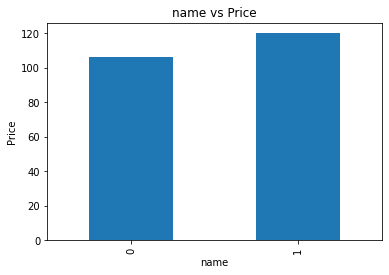

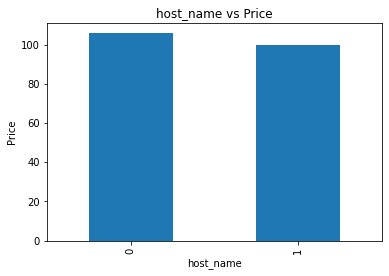

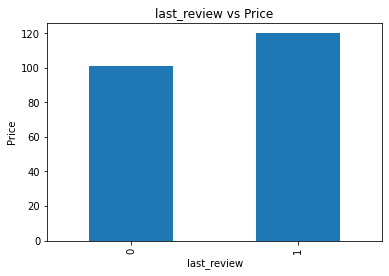

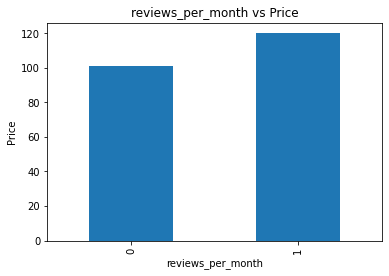

In [83]:
for each in nul_col_names:
    tempdf = data.copy()
    tempdf[each] = np.where(tempdf[each].isnull(), 1, 0)
    tempdf.groupby(each)['price'].median().plot.bar()
    plt.title(each + ' vs Price')
    plt.xlabel(each )
    plt.ylabel('Price')
    plt.show()

Its quite clear our nan values, indicated by 1, are somewhat related to our price, all nan instances are within 95 to 120 median price range. 

Dropping out the rows is ***not adisable***

* once more we see the similarity in bar graphsof our 'last_review' and 'reviews_per_month' column.

# ##### Relationship between review columns with nan vals

##### Check data type of columns with nan values

In [68]:
data[nul_col_names].dtypes

name                  object
host_name             object
last_review           object
reviews_per_month    float64
dtype: object

We have just one numeric column with nan values. Lets explore...

In [76]:
data[nul_col_names].describe()

,reviews_per_month
count,38843.000000
mean,1.373221
std,1.680442
min,0.010000
25%,0.190000
50%,0.720000
75%,2.020000
max,58.500000


Interestingly the minimum value in this column sits at 0.01, while max is capped at 58.5. Half of its values are below 0.72. it has a mean of 1.37

### 2. Numerical Columns

In [88]:
num_cols = [each for each in data.columns if data[each].dtypes != 'object']
data[num_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   host_id                         48895 non-null  int64  
 2   latitude                        48895 non-null  float64
 3   longitude                       48895 non-null  float64
 4   price                           48895 non-null  int64  
 5   minimum_nights                  48895 non-null  int64  
 6   number_of_reviews               48895 non-null  int64  
 7   reviews_per_month               38843 non-null  float64
 8   calculated_host_listings_count  48895 non-null  int64  
 9   availability_365                48895 non-null  int64  
dtypes: float64(3), int64(7)
memory usage: 3.7 MB


We have 10 numerical columns out of the total 16, only one of which has missing values.

In [92]:
data[num_cols].head(10)

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,2787,40.64749,-73.97237,149,1,9,0.21,6,365
1,2595,2845,40.75362,-73.98377,225,1,45,0.38,2,355
2,3647,4632,40.80902,-73.94190,150,3,0,NaN,1,365
3,3831,4869,40.68514,-73.95976,89,1,270,4.64,1,194
4,5022,7192,40.79851,-73.94399,80,10,9,0.10,1,0
5,5099,7322,40.74767,-73.97500,200,3,74,0.59,1,129
6,5121,7356,40.68688,-73.95596,60,45,49,0.40,1,0
7,5178,8967,40.76489,-73.98493,79,2,430,3.47,1,220
8,5203,7490,40.80178,-73.96723,79,2,118,0.99,1,0
9,5238,7549,40.71344,-73.99037,150,1,160,1.33,4,188


Looking at the first 10 rows, we see a variety of numerical data; continuos and discrete values as well as negative values.

In [89]:
data[num_cols].describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [95]:
#get unique values of each column
for i,each in enumerate(num_cols):
    print("{} has {} unique values".format(num_cols[i], len(data[each].unique())))

id has 48895 unique values
host_id has 37457 unique values
latitude has 19048 unique values
longitude has 14718 unique values
price has 674 unique values
minimum_nights has 109 unique values
number_of_reviews has 394 unique values
reviews_per_month has 938 unique values
calculated_host_listings_count has 47 unique values
availability_365 has 366 unique values


In [102]:
#matrix correlation
data.corr().style.background_gradient(cmap = 'coolwarm')

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
id,1.000000,0.588290,-0.003125,0.090908,0.010619,-0.013224,-0.319760,0.291828,0.133272,0.085468
host_id,0.588290,1.000000,0.020224,0.127055,0.015309,-0.017364,-0.140106,0.296417,0.154950,0.203492
latitude,-0.003125,0.020224,1.000000,0.084788,0.033939,0.024869,-0.015389,-0.010142,0.019517,-0.010983
longitude,0.090908,0.127055,0.084788,1.000000,-0.150019,-0.062747,0.059094,0.145948,-0.114713,0.082731
price,0.010619,0.015309,0.033939,-0.150019,1.000000,0.042799,-0.047954,-0.030608,0.057472,0.081829
minimum_nights,-0.013224,-0.017364,0.024869,-0.062747,0.042799,1.000000,-0.080116,-0.121702,0.127960,0.144303
number_of_reviews,-0.319760,-0.140106,-0.015389,0.059094,-0.047954,-0.080116,1.000000,0.549868,-0.072376,0.172028
reviews_per_month,0.291828,0.296417,-0.010142,0.145948,-0.030608,-0.121702,0.549868,1.000000,-0.009421,0.185791
calculated_host_listings_count,0.133272,0.154950,0.019517,-0.114713,0.057472,0.127960,-0.072376,-0.009421,1.000000,0.225701
availability_365,0.085468,0.203492,-0.010983,0.082731,0.081829,0.144303,0.172028,0.185791,0.225701,1.000000


> No strong correlation 

In [103]:
price_corr = data.corr()['price']
price_corr.sort_values(ascending = False)

price                             1.000000
availability_365                  0.081829
calculated_host_listings_count    0.057472
minimum_nights                    0.042799
latitude                          0.033939
host_id                           0.015309
id                                0.010619
reviews_per_month                -0.030608
number_of_reviews                -0.047954
longitude                        -0.150019
Name: price, dtype: float64

In [108]:
first5 = price_corr.sort_values(ascending = False).index[:5].to_list()
first5

['price',
 'availability_365',
 'calculated_host_listings_count',
 'minimum_nights',
 'latitude']

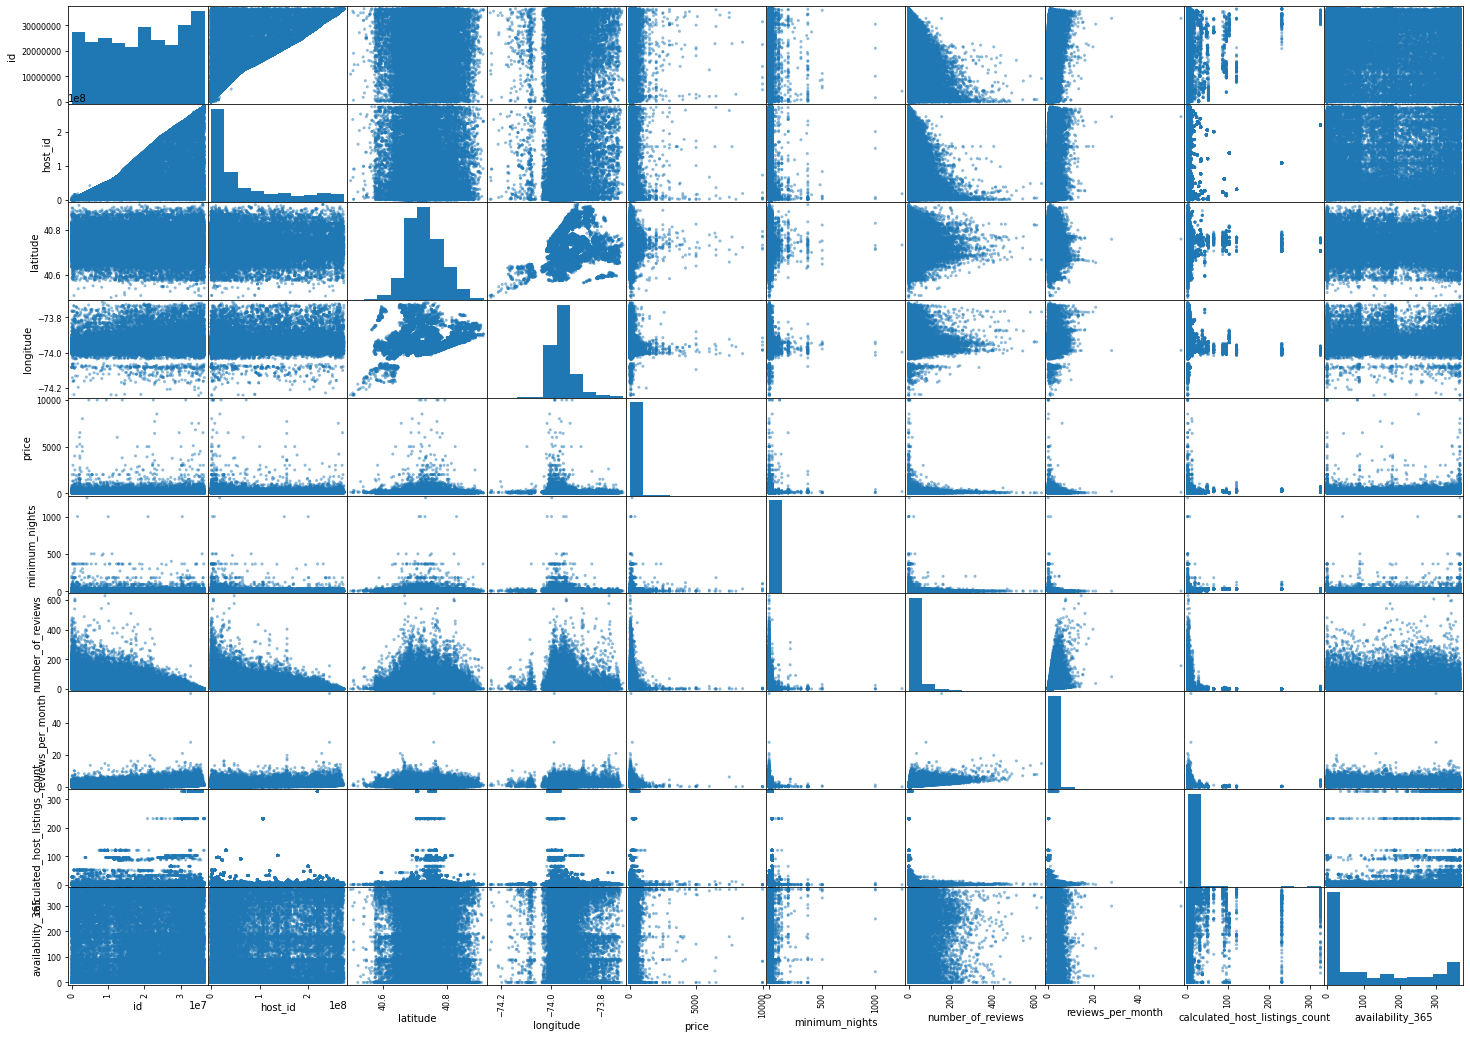

In [116]:
from pandas.plotting import scatter_matrix

scatter_matrix(data[num_cols], figsize=(25, 18))
plt.show()

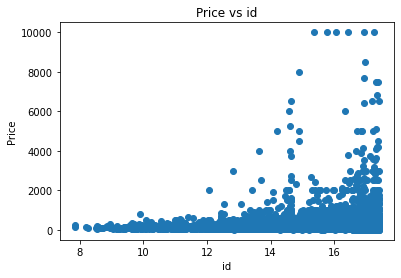

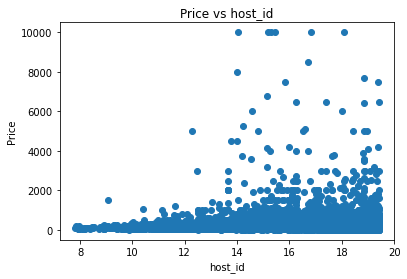

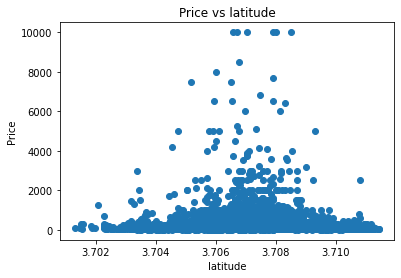

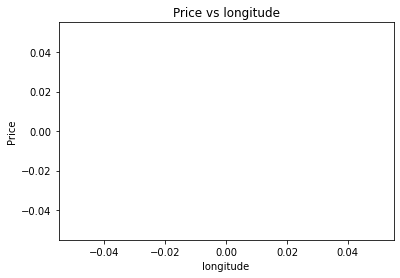

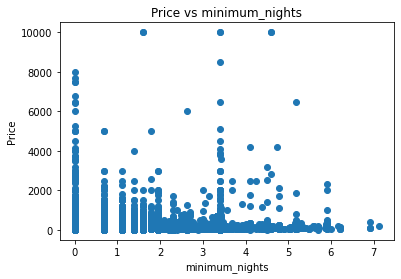

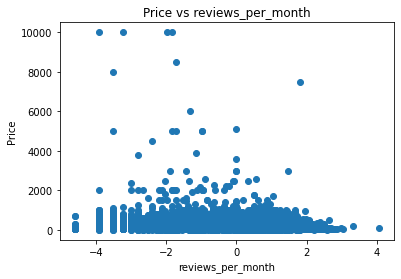

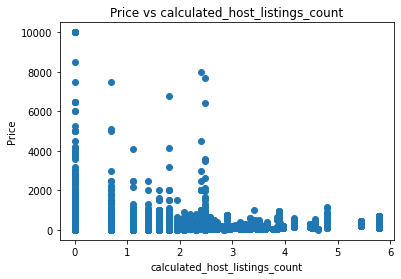

In [122]:
for col in num_cols:
    tempdf = data.copy() 
    if 0 in vardata[col].unique():
        pass
    else:
        tempdf[col] = np.log(tempdf[col])
        tempdf['price'] = data['price']
        plt.scatter(tempdf[col],vardata['price'])
        plt.xlabel(col)
        plt.ylabel('Price') 
        plt.title('Price vs {}'.format(col) )
        plt.show()

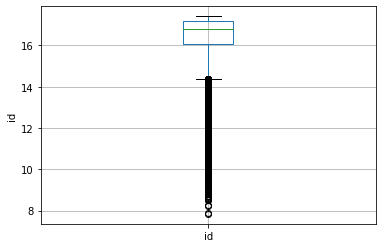

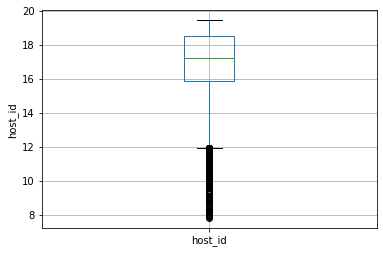

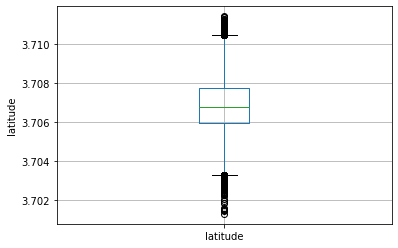

C:\Users\santa\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


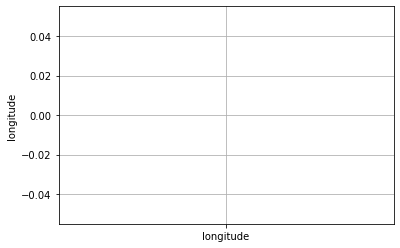

C:\Users\santa\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


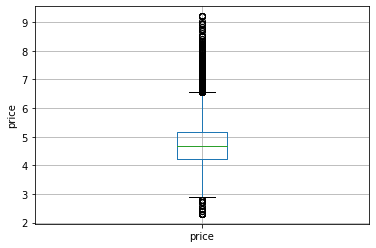

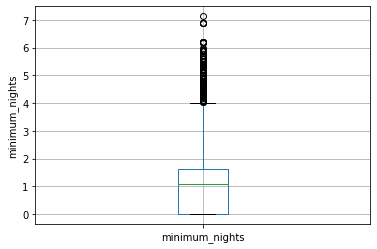

C:\Users\santa\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


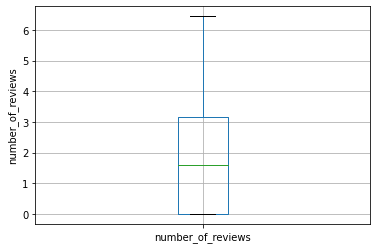

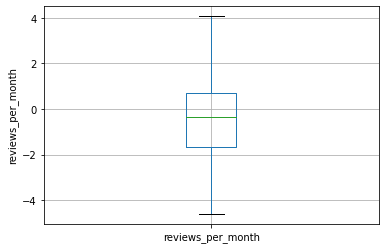

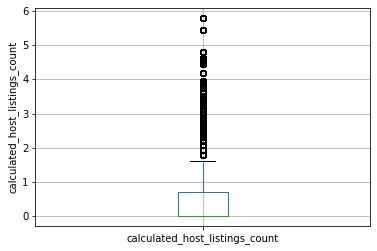

C:\Users\santa\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\santa\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\lib\function_base.py:4009: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
C:\Users\santa\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\cbook\__init__.py:1211: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
C:\Users\santa\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\cbook\__init__.py:1218: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
C:\Users\santa\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\cbook\__init__.py:1226: RuntimeWarning: invalid value encountered in less
  x[x < stats['whislo']],


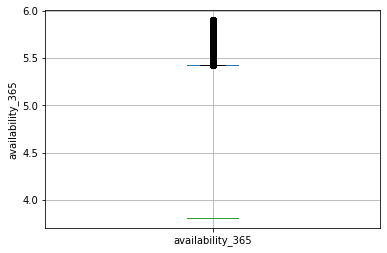

In [125]:
for each in num_cols:
        vardata=data.copy()
        vardata[each]=np.log(vardata[each])
        vardata.boxplot(column = each)
#         plt.xlabel(each)
        plt.ylabel(each)
        plt.show()

We see a lot of outliers in our numerical columns

#### Categorical Features

In [126]:
catcols = [col for col in data.select_dtypes(include = 'object')]
print('Categorical columns/featuers in our dataset = {}'.format(len(catcols))) #== 6
catcols

Categorical columns/featuers in our dataset = 6


['name',
 'host_name',
 'neighbourhood_group',
 'neighbourhood',
 'room_type',
 'last_review']

In [129]:
data[catcols].head()

,name,host_name,neighbourhood_group,neighbourhood,room_type,last_review
0,Clean & quiet apt home by the park,John,Brooklyn,Kensington,Private room,2018-10-19
1,Skylit Midtown Castle,Jennifer,Manhattan,Midtown,Entire home/apt,2019-05-21
2,THE VILLAGE OF HARLEM....NEW YORK !,Elisabeth,Manhattan,Harlem,Private room,NaN
3,Cozy Entire Floor of Brownstone,LisaRoxanne,Brooklyn,Clinton Hill,Entire home/apt,2019-07-05
4,Entire Apt: Spacious Studio/Loft by central park,Laura,Manhattan,East Harlem,Entire home/apt,2018-11-19


In [162]:
#now we are going to find out the number of unique values in our catcol dataset

for each in catcols:
    print(f"{each}: {len(data[each].unique())} values")

name: 47906 values
host_name: 11453 values
neighbourhood_group: 5 values
neighbourhood: 221 values
room_type: 3 values
last_review: 1765 values


Neighbourhood_group, room_type and perhaps neighbourhood could be a keen area of interest we could look into as they have only a handful of unique values.

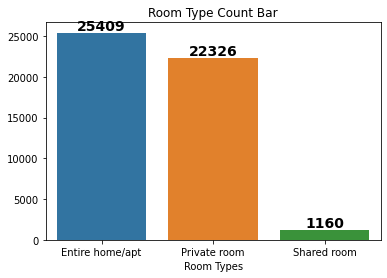

In [166]:
room_type_plot = sns.countplot(x="room_type", order = data.room_type.value_counts().index, data=data)
room_type_plot.set(xlabel='Room Types', ylabel='', title='Room Type Count Bar')
for bar in room_type_plot.patches:
    h = bar.get_height()
    room_type_plot.text(
        bar.get_x() + bar.get_width()/2.,  # bar index (x coordinate of text)
        h,                                 # y coordinate of text
        '%d' % int(h),                     # y label
        ha='center', 
        va='bottom',
        color='black',
        fontweight='bold',
        size=14)
    
plt.show()

From the graph we see the number of room type entries in our dataset.

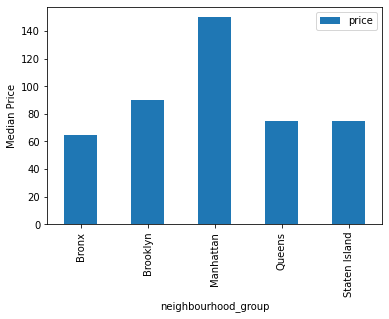

In [171]:
for each in ["neighbourhood_group"]:#, 'room_type']:
    tempdf = data.copy()
    tempdf.groupby(each)['price'].median().plot.bar()
    plt.xlabel(each)
    plt.ylabel('Median Price')
    plt.legend()
    plt.show()
    
    labels = data[each].value_counts().index
    sizes = data[each].value_counts().values
    exp = [i for i in range(len(labels)/10)]
    
    fig, ax = plt.subplots()
    wedges, texts, autotexts = ax.pie(sizes, labels)

In [217]:
data.neighbourhood_group.value_counts().sort_values(ascending = False)

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

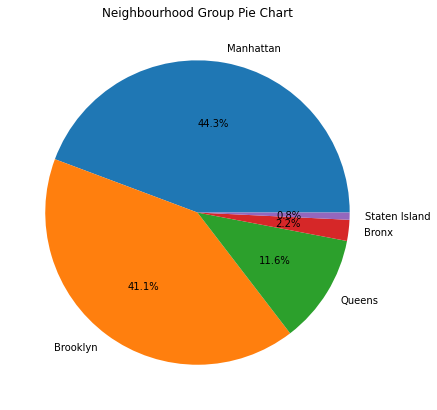

In [219]:
labels = data['neighbourhood_group'].value_counts().index
sizes = data['neighbourhood_group'].value_counts().values
explode = (0.1, 0.2, 0.3, 0.4, 0.6)

fig, ax = plt.subplots(figsize = (15,7))
ax.pie(sizes, labels=labels, autopct='%1.1f%%', )
ax.set(title="Neighbourhood Group Pie Chart")

         
plt.show()

In [234]:
hoodf = pd.DataFrame( data.groupby('neighbourhood_group')['neighbourhood'], columns = ['NeighbourHood Group', 'Neighbourhood'])
hoodf


,NeighbourHood Group,Neighbourhood
0,Bronx,171 Highbridge 207 Hig...
1,Brooklyn,0 Kensington 3 Cli...
2,Manhattan,1 Midtown 2 Harle...
3,Queens,46 Long Island City 77 Woo...
4,Staten Island,169 St. George 249 Tompkinsvill...


In [246]:
nl = [each for each in data.neighbourhood_group.unique()]

for each in nl:
    hoods = data.neighbourhood[data.neighbourhood_group == each].unique()
    print(each, str(len(hoods))+ ' unique neighbourhoods', hoods[:5], '\n')

Brooklyn 47 unique neighbourhoods ['Kensington' 'Clinton Hill' 'Bedford-Stuyvesant' 'South Slope'
 'Williamsburg'] 

Manhattan 32 unique neighbourhoods ['Midtown' 'Harlem' 'East Harlem' 'Murray Hill' "Hell's Kitchen"] 

Queens 51 unique neighbourhoods ['Long Island City' 'Woodside' 'Flushing' 'Sunnyside' 'Ridgewood'] 

Staten Island 43 unique neighbourhoods ['St. George' 'Tompkinsville' 'Emerson Hill' 'Shore Acres' 'Arrochar'] 

Bronx 48 unique neighbourhoods ['Highbridge' 'Clason Point' 'Eastchester' 'Kingsbridge' 'Woodlawn'] 



How do these nighbourhood groups match up against our prices

In [252]:
data['price'].describe() #numeric columns seule

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

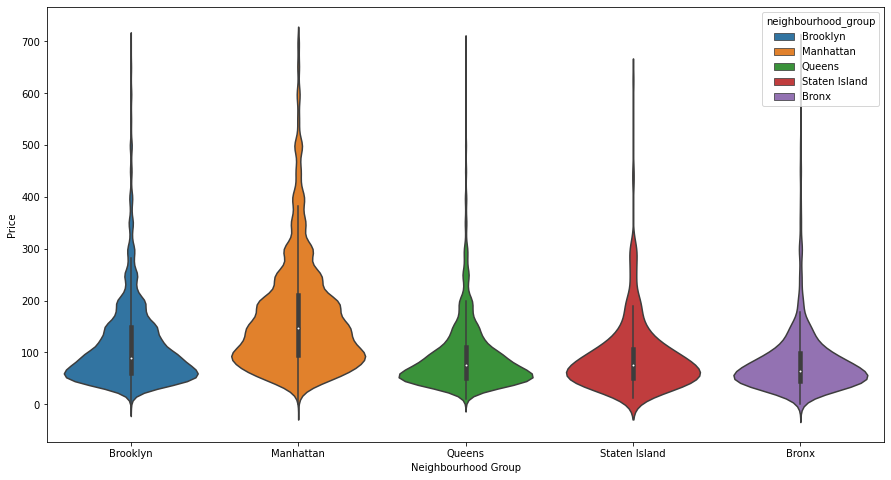

In [283]:
#Density of price in terms of neighbourhood groups
price_cap = 175*4  #quadriple the value of 75th percentile of price

#create dataset with price cap as ceiling price
tempdf = data[data['price']< price_cap]
# tempdf.price.describe()

# #create violin plot
f, ax = plt.subplots(figsize = (15,8))
graph = sns.violinplot(ax = ax, x ='neighbourhood_group', y = 'price', 
                      hue='neighbourhood_group', data = tempdf,dodge=False)

graph.set(xlabel = 'Neighbourhood Group', ylabel = "Price")
plt.show()


From the violin plot we notice the prices span from 0 to 500 accross all neighbourhood groups with a majority of prices averaging between 0 and 175; especialy for areas like Bronx, Staten Island and Queens

Among the top two neighbourhoods, Manhattan has price spanning from 0 to 500 within our price limit; identifying it as the costliest neighbourhood group on the avverage.

In [286]:
data.corr()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
id,1.000000,0.588290,-0.003125,0.090908,0.010619,-0.013224,-0.319760,0.291828,0.133272,0.085468
host_id,0.588290,1.000000,0.020224,0.127055,0.015309,-0.017364,-0.140106,0.296417,0.154950,0.203492
latitude,-0.003125,0.020224,1.000000,0.084788,0.033939,0.024869,-0.015389,-0.010142,0.019517,-0.010983
longitude,0.090908,0.127055,0.084788,1.000000,-0.150019,-0.062747,0.059094,0.145948,-0.114713,0.082731
price,0.010619,0.015309,0.033939,-0.150019,1.000000,0.042799,-0.047954,-0.030608,0.057472,0.081829
minimum_nights,-0.013224,-0.017364,0.024869,-0.062747,0.042799,1.000000,-0.080116,-0.121702,0.127960,0.144303
number_of_reviews,-0.319760,-0.140106,-0.015389,0.059094,-0.047954,-0.080116,1.000000,0.549868,-0.072376,0.172028
reviews_per_month,0.291828,0.296417,-0.010142,0.145948,-0.030608,-0.121702,0.549868,1.000000,-0.009421,0.185791
calculated_host_listings_count,0.133272,0.154950,0.019517,-0.114713,0.057472,0.127960,-0.072376,-0.009421,1.000000,0.225701
availability_365,0.085468,0.203492,-0.010983,0.082731,0.081829,0.144303,0.172028,0.185791,0.225701,1.000000


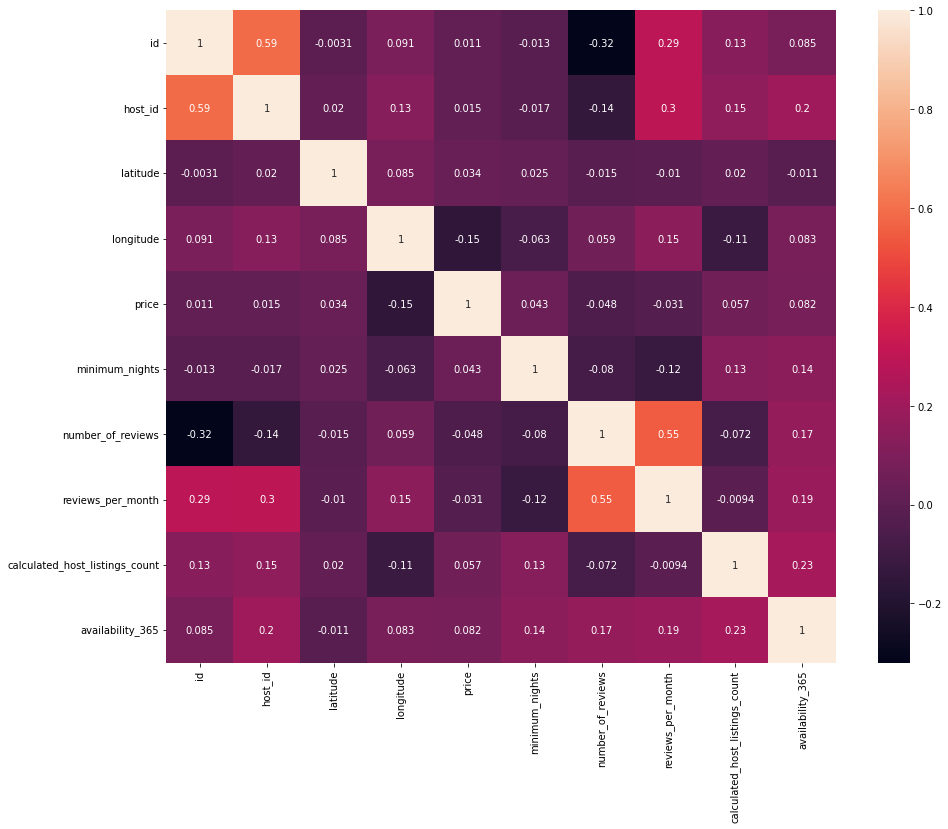

In [299]:
plt.figure(figsize=(15,12))
ax = sns.heatmap(data.corr(), annot = True)

### Handle Missing Values

In [295]:
#display null column names
nul_cols
data[nul_cols].isnull().sum()

name                    16
host_name               21
last_review          10052
reviews_per_month    10052
dtype: int64

In [296]:
data[nul_cols].dtypes

name                  object
host_name             object
last_review           object
reviews_per_month    float64
dtype: object

before we sort missing values, we will check for any similarities between the last review and reviews per month columns

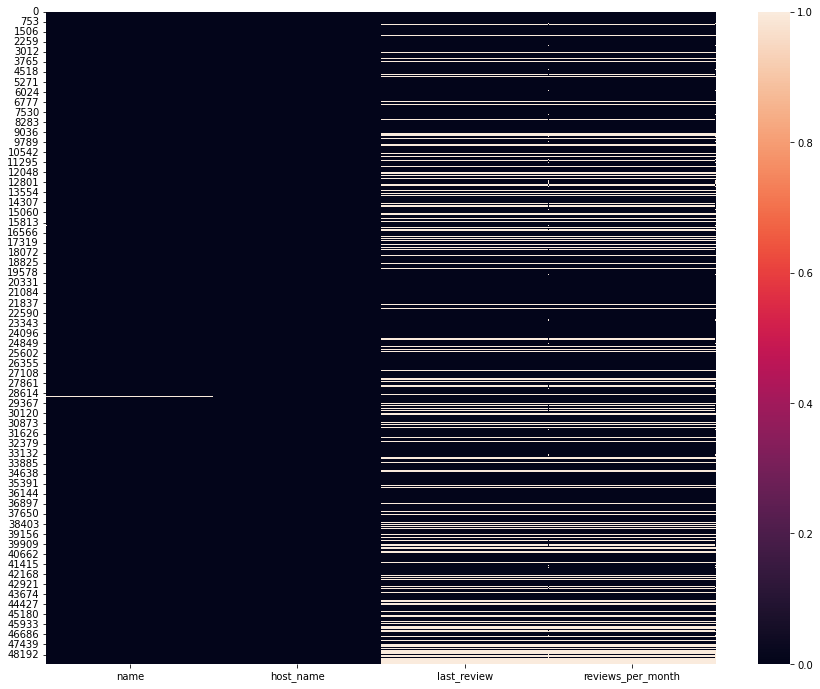

In [303]:
plt.figure(figsize = (15,12))
ax = sns.heatmap(data[nul_cols].isna())

From the graph it looks as though the same rows are missing values for the last review and reviews per month attributes. Looking at our dataframe, it makes sense that these two columns be associated with the number of reviews columns.

In [346]:
rev_null = []
for i,num in enumerate(data.id):
    if reviewdf.number_of_reviews[i] == 0:
        rev_null.append(num)
        
len(rev_null) 

10052

returns the val 10,052, equivalent to the null values of both last review and reviews per month, we will create a slice of our dataframe and fill missing instances with zeros, after which we will run the isnull mehtod again.

In [356]:
tempdf = data.copy().set_index('id')
tempdf

for each in rev_null:
    tempdf.reviews_per_month[each] = 0
    tempdf.last_review[each] = 0
tempdf.isna().sum()

C:\Users\santa\AppData\Local\Temp/ipykernel_11724/598696683.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tempdf.reviews_per_month[each] = 0
C:\Users\santa\AppData\Local\Temp/ipykernel_11724/598696683.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tempdf.last_review[each] = 0


name                              16
host_id                            0
host_name                         21
neighbourhood_group                0
neighbourhood                      0
latitude                           0
longitude                          0
room_type                          0
price                              0
minimum_nights                     0
number_of_reviews                  0
last_review                        0
reviews_per_month                  0
calculated_host_listings_count     0
availability_365                   0
dtype: int64

We were right, in thinking the two columns had something to do with the number of reviews column

We are going to fill these columns in our dataframe

In [361]:
new_data= data.copy()
new_data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [370]:
#fill categorical columns, drop last review column
for each in nul_cols[:2]:
    new_data[each].fillna('Missing', inplace = True)

new_data[nul_cols].isna().sum()

name                     0
host_name                0
last_review          10052
reviews_per_month    10052
dtype: int64

In [381]:
#fill numeric columns/attribute with 0 as all nan values are as a result of 0 vals in no. of reviews
new_data.reviews_per_month.fillna(0, inplace = True)

#now drop last_review column
new_data = new_data.drop(['last_review'], axis= 1)
new_data.isna().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

### Handling Categorical data



In [396]:
dropdf = new_data.drop(['name', 'host_name', 'id'], axis=1)
dropdf.head()

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365
3,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


In [398]:
cat_cols = [each for each in dropdf.columns if dropdf[each].dtypes == 'object']
cat_cols

['neighbourhood_group', 'neighbourhood', 'room_type']

In [401]:
#convert categorical to num
for each in cat_cols:
    labels_ordered=dropdf.groupby([each])['price'].mean().sort_values().index
    count=dropdf.groupby([each])['price'].mean().count()
#     print(labels_ordered, count)
    
    labels_ordered={k:i for i,k in enumerate(labels_ordered,0)}
    dropdf[each]=dropdf[each].map(labels_ordered)
#     print('New',labels_ordered, count)

dropdf.head()

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2787,3,92,40.64749,-73.97237,1,149,1,9,0.21,6,365
1,2845,4,209,40.75362,-73.98377,2,225,1,45,0.38,2,355
2,4632,4,136,40.80902,-73.94190,1,150,3,0,0.00,1,365
3,4869,3,184,40.68514,-73.95976,2,89,1,270,4.64,1,194
4,7192,4,148,40.79851,-73.94399,2,80,10,9,0.10,1,0


In [402]:
cat_cols = [each for each in dropdf.columns if dropdf[each].dtypes == 'object']
cat_cols

[]

In [404]:
featcols = [feat for feat in dropdf.columns if feat not in ['price']]

from sklearn.preprocessing import StandardScaler
var_scaler=StandardScaler()
var_scaler.fit(dropdf[featcols]) 

StandardScaler()

In [406]:
#now transform the train and test set & add on tand saleprice vars
vardata = pd.concat([dropdf[['price']].reset_index(drop=True),
                    pd.DataFrame(var_scaler.transform(dropdf[featcols]),
                                columns=featcols)],
                   axis=1)
vardata.head()

,price,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,149,-0.860159,-0.130540,-1.086842,-1.493849,-0.437652,-0.909359,-0.293996,-0.320414,-0.551511,-0.034716,1.916250
1,225,-0.860158,0.824531,1.289155,0.452436,-0.684639,0.924247,-0.293996,0.487665,-0.445079,-0.156104,1.840275
2,150,-0.860135,0.824531,-0.193305,1.468399,0.222497,-0.909359,-0.196484,-0.522433,-0.682986,-0.186451,1.916250
3,89,-0.860132,-0.130540,0.781463,-0.803398,-0.164450,0.924247,-0.293996,5.538156,2.221978,-0.186451,0.617065
4,80,-0.860103,0.824531,0.050387,1.275660,0.177216,0.924247,0.144807,-0.320414,-0.620379,-0.186451,-0.856865


In [409]:
vardata.to_csv('mino_data.csv')

### SELECT & TRAIN A MODEL

In [410]:
X = vardata.drop(['price'], axis = 1)
Y = vardata[['price']]

In [411]:
X.shape, Y.shape

((48895, 11), (48895, 1))

In [412]:
from sklearn.model_selection import train_test_split
(X_train, X_test, y_train, y_test )= train_test_split(X, Y, random_state = 42, test_size = 0.2)

In [414]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape 

((39116, 11), (9779, 11), (39116, 1), (9779, 1))

### Linear Regression Model

In [415]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

Now that we have a working Linear Regression model we will try it out on a few instances from the training set:

In [425]:
minidata = X_train.iloc[:5]
minilabels = y_train[:5]
print('Predictios:{}\n'.format(lin_reg.predict(minidata)))
print('Labels:', minilabels)

Predictios:[[183.4107846 ]
 [ 58.01913449]
 [ 66.558953  ]
 [165.14670277]
 [ 20.82359887]]

Labels:        price
32645    295
23615     70
31183     58
29260     75
7275      38


There is clearly some difference from the models predictions and actual values on the training set. Lets go ahead and check some metrics.

In [431]:
from sklearn import metrics
predictions = lin_reg.predict(X_train)

#R squared error = gets teh varaince btn y and yhat
R2error = metrics.r2_score(y_train, predictions)

#mean abs error
mae = metrics.mean_absolute_error(y_train, predictions)

#mean_squared_error
mse = metrics.mean_squared_error(y_train, predictions)

print('R squared error: ', R2error*100)
print('Mean absolute error: ', mae)
print('Root Mean squared error: ', np.sqrt(mse))

R squared error:  9.984011313449848
Mean absolute error:  75.58926951529934
Mean squared error:  234.37858858863007


Not good, We could try another model

### DecisionTreeRegressor

In [434]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(X_train, y_train)

DecisionTreeRegressor()

In [436]:
predictions = tree_reg.predict(X_train)


#R squared error = gets teh varaince btn y and yhat
R2error = metrics.r2_score(y_train, predictions)

#mean abs error
mae = metrics.mean_absolute_error(y_train, predictions)

#mean_squared_error
mse = metrics.mean_squared_error(y_train, predictions)

print('R squared error: ', R2error*100)
print('Mean absolute error: ', mae)
print('Root Mean squared error: ', np.sqrt(mse))

R squared error:  99.99994763521049
Mean absolute error:  0.0012782493097453728
Root Mean squared error:  0.17876306314122703


Our root mean square error is better than before and an R2 error of 99 %. It is perhaps too good to be true. Lets try the K fold cross validation feature

In [437]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, X_train, y_train,
                         scoring="neg_mean_squared_error", cv=10)

tree_rmse_scores = np.sqrt(-scores)

In [438]:
def print_scores(scores):
    print('Scores:', scores)
    print('Mean:', scores.mean())
    print('Standard Deviation:', scores.std())
    
print_scores(tree_rmse_scores)

Scores: [300.85480298 233.30531639 189.94576976 349.80256299 250.12901834
 325.45355327 255.7244066  342.98579107 313.13129536 379.34266445]
Mean: 294.0675181207188
Standard Deviation: 56.65685385032987


It just so happens that our decision Tree model is overfitting so badly that it performs worse than the Linear Regression model

### Random Forest Regressor

In [439]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(X_train, y_train)

C:\Users\santa\AppData\Local\Temp/ipykernel_11724/71352386.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest_reg.fit(X_train, y_train)


RandomForestRegressor()

In [440]:
predictions = forest_reg.predict(X_train)


#R squared error = gets teh varaince btn y and yhat
R2error = metrics.r2_score(y_train, predictions)

#mean abs error
mae = metrics.mean_absolute_error(y_train, predictions)

#mean_squared_error
mse = metrics.mean_squared_error(y_train, predictions)

print('R squared error: ', R2error*100)
print('Mean absolute error: ', mae)
print('Root Mean squared error: ', np.sqrt(mse))

R squared error:  88.41513558853728
Mean absolute error:  24.94955364142794
Root Mean squared error:  84.0821066545887


This looks insanely better than the other values, lets evaluate that and see how it checks out. 

In [441]:
scores = cross_val_score(forest_reg, X_train, y_train,
                         scoring="neg_mean_squared_error", cv=10)

forest_rmse_scores = np.sqrt(-scores)

C:\Users\santa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\santa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\santa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\santa\AppData\Local\Programs\Py

In [443]:
print_scores(forest_rmse_scores)

Scores: [165.61008992 183.8060227  178.15079738 266.3278052  182.41353164
 233.28506622 207.23473018 215.04721456 280.92734315 320.1517176 ]
Mean: 223.29543185516542
Standard Deviation: 48.55565297867451


We will check out one last model

## XGBoost Regressor

In [444]:
from xgboost import XGBRegressor
xgb = XGBRegressor()
xgb.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [445]:
predictions = xgb.predict(X_train)


#R squared error = gets teh varaince btn y and yhat
R2error = metrics.r2_score(y_train, predictions)

#mean abs error
mae = metrics.mean_absolute_error(y_train, predictions)

#mean_squared_error
mse = metrics.mean_squared_error(y_train, predictions)

print('R squared error: ', R2error*100)
print('Mean absolute error: ', mae)
print('Root Mean squared error: ', np.sqrt(mse))

R squared error:  81.4678992784722
Mean absolute error:  49.8033730797922
Root Mean squared error:  106.34582204075076


In [446]:
scores = cross_val_score(xgb, X_train, y_train,
                         scoring="neg_mean_squared_error", cv=10)

forest_rmse_scores = np.sqrt(-scores)
print_scores(forest_rmse_scores)

Scores: [164.60123744 192.15283659 179.46811464 265.61530437 201.16680728
 218.80812729 214.69932567 231.26155965 280.77675723 324.43675479]
Mean: 227.29868249434966
Standard Deviation: 47.06086380220357


### Fine Tuning

In [447]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=42)

# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(X_train, y_train)

C:\Users\santa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\santa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\santa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\santa\AppData\Local\Programs\Py

C:\Users\santa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\santa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\santa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\santa\AppData\Local\Programs\Py

C:\Users\santa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\santa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\santa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\santa\AppData\Local\Programs\Py

C:\Users\santa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\santa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\santa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\santa\AppData\Local\Programs\Py

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [448]:
grid_search.best_params_

{'max_features': 2, 'n_estimators': 30}

In [449]:
grid_search.best_estimator_

RandomForestRegressor(max_features=2, n_estimators=30, random_state=42)

In [450]:
var_cvres = grid_search.cv_results_
for mean_score, params in zip(var_cvres['mean_test_score'], var_cvres['params']):
    print(np.sqrt(-mean_score), params)

259.64177736533304 {'max_features': 2, 'n_estimators': 3}
233.3661037052148 {'max_features': 2, 'n_estimators': 10}
226.67784902039708 {'max_features': 2, 'n_estimators': 30}
259.0433013517058 {'max_features': 4, 'n_estimators': 3}
233.65597711179748 {'max_features': 4, 'n_estimators': 10}
227.40214273219328 {'max_features': 4, 'n_estimators': 30}
262.05588060055976 {'max_features': 6, 'n_estimators': 3}
234.3362664048175 {'max_features': 6, 'n_estimators': 10}
228.5841325900364 {'max_features': 6, 'n_estimators': 30}
262.25613337368264 {'max_features': 8, 'n_estimators': 3}
238.56787439845195 {'max_features': 8, 'n_estimators': 10}
232.50292062969166 {'max_features': 8, 'n_estimators': 30}
259.518202960256 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
234.68729421162976 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
253.002742492329 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
229.9040412590681 {'bootstrap': False, 'max_features': 3, 'n_estimato

In [454]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=8),
    }

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', 
                                random_state=42)


rnd_search.fit(X_train, y_train)

C:\Users\santa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\santa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\santa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\santa\AppData\Local\Programs\Py

C:\Users\santa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\santa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\santa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\santa\AppData\Local\Programs\Py

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001FAD50E0340>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001FAD50E1EA0>},
                   random_state=42, scoring='neg_mean_squared_error')

In [455]:
rnd_search.best_estimator_


RandomForestRegressor(max_features=3, n_estimators=150, random_state=42)

In [456]:
rnd_search.best_params_

{'max_features': 3, 'n_estimators': 150}

In [459]:
fm1 = grid_search.best_estimator_

fm1_predictions = fm1.predict(X_train)

fm1_mse = mean_squared_error(y_train, fm1_predictions)
fm1_rmse = np.sqrt(fm1_mse)
fm1_rmse

86.46582083258457

In [460]:
fm2 = rnd_search.best_estimator_

fm2_predictions = fm1.predict(X_train)

fm2_rmse = mean_squared_error(y_train, fm1_predictions)
fm2_rmse = np.sqrt(fm1_rmse)
fm2_rmse

9.298699953895952

In [461]:
final_model = rnd_search.best_estimator_

final_predictions = final_model.predict(X_test)
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

183.6777955233975

# The End

In [462]:
# final_model = grid_search.best_estimator_

# final_predictions = final_model.predict(X_test)
# final_mse = mean_squared_error(y_test, final_predictions)
# final_rmse = np.sqrt(final_mse)
# final_rmse returns 188.92

188.9258379709187